In [155]:
# Check for GPU
!nvidia-smi -L

GPU 0: NVIDIA GeForce RTX 3050 Ti Laptop GPU (UUID: GPU-5de0f88e-bc8d-42f4-e49e-7010244dab41)


In [156]:
# Get the data
import os
import pandas as py
import pandas_ta as ta
import numpy as np
import yfinance as yf
import datetime as dt
#from pandas_datareader import data as pdr
#from yahoofinancials import YahooFinancials

#yf.pdr_override()

#now_time=dt.datetime.now()
#start_time = dt.datetime(now_time.year - 10, now_time.month , now_time.day)

bad_names=[]

# Get the absolute path of the current file
# current_file = os.path.abspath(__file__) # if with a python file 

# Get the directory name of the file
# current_dir = os.path.dirname(current_file) # with a python file
current_dir = os.getcwd()

# Create the "data" folder in the current directory
data_dir = os.path.join(current_dir, 'data')

if not os.path.exists(data_dir):
    os.mkdir(data_dir)

def download_stock(stock):
    try:
        print(stock)
        output_name = stock + '_data.csv'
        df = yf.Ticker(stock).history(period='10y')[['Close', 'Open', 'High', 'Volume', 'Low']]
        # Calculate MACD values using the pandas_ta library
        df.ta.macd(close='Close', fast=12, slow=26, signal=9, append=True, append_name='macd')

        
        df.to_csv("data/stock_"+ output_name)
    except Exception as e:
        bad_names.append(stock)
        print('bad: %s' % (stock))
        print(e)

download_stock('AAPL')
download_stock('AMZN')
download_stock('MSFT')
print(data_dir)

AAPL
AMZN
MSFT
d:\Development\Data-Science\Stock-Analysis\data


In [157]:
import os
import pandas as pd

# Get the path of the current directory
current_dir = os.getcwd()

# Create the path to the CSV file
csv_file_path = os.path.join(current_dir, 'data', 'stock_AAPL_data.csv')

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path, parse_dates=['Date'], 
                 usecols=['Date', 'Close','Open','High','Volume','Low','MACD_12_26_9','MACDh_12_26_9','MACDs_12_26_9'],
                 index_col=['Date'])

# Split the first column into two columns
#df[["Date", "Time"]] = df[0].str.split(",", expand=True)

# Drop the "Time" column
#df = df.drop(columns=["Time"])

# Set the "Date" column as the index
#df = df.set_index("Date")

# Convert the "Date" index to a datetime object
#df.index = pd.to_datetime(df.index)

# Display the DataFrame
print(df.head())

                               Close       Open       High     Volume  \
Date                                                                    
2013-03-22 00:00:00-04:00  14.247962  14.021863  14.253822  395105200   
2013-03-25 00:00:00-04:00  14.299477  14.333715  14.495965  501135600   
2013-03-26 00:00:00-04:00  14.224209  14.356844  14.369183  294294000   
2013-03-27 00:00:00-04:00  13.944746  14.079851  14.090338  331237200   
2013-03-28 00:00:00-04:00  13.654182  13.875038  13.936729  442839600   

                                 Low  MACD_12_26_9  MACDh_12_26_9  \
Date                                                                
2013-03-22 00:00:00-04:00  13.976520           NaN            NaN   
2013-03-25 00:00:00-04:00  14.243955           NaN            NaN   
2013-03-26 00:00:00-04:00  14.205393           NaN            NaN   
2013-03-27 00:00:00-04:00  13.903105           NaN            NaN   
2013-03-28 00:00:00-04:00  13.622103           NaN            NaN   

    

In [158]:
df.info

<bound method DataFrame.info of                                 Close        Open        High     Volume  \
Date                                                                       
2013-03-22 00:00:00-04:00   14.247962   14.021863   14.253822  395105200   
2013-03-25 00:00:00-04:00   14.299477   14.333715   14.495965  501135600   
2013-03-26 00:00:00-04:00   14.224209   14.356844   14.369183  294294000   
2013-03-27 00:00:00-04:00   13.944746   14.079851   14.090338  331237200   
2013-03-28 00:00:00-04:00   13.654182   13.875038   13.936729  442839600   
...                               ...         ...         ...        ...   
2023-03-15 00:00:00-04:00  152.990005  151.190002  153.250000   77167900   
2023-03-16 00:00:00-04:00  155.850006  152.160004  156.460007   76161100   
2023-03-17 00:00:00-04:00  155.000000  156.080002  156.740005   98862500   
2023-03-20 00:00:00-04:00  157.399994  155.070007  157.820007   73641400   
2023-03-21 00:00:00-04:00  159.279999  157.320007  159.3

In [159]:
# How many samples do we have?
len(df)

2517

In [160]:
len(df['Close'])

2517

In [161]:
apple_stock = pd.DataFrame(df['Close']).rename(columns= {"Close" : "Price"})
apple_stock.head(10)

,Price
Date,
2013-03-22 00:00:00-04:00,14.247962
2013-03-25 00:00:00-04:00,14.299477
2013-03-26 00:00:00-04:00,14.224209
2013-03-27 00:00:00-04:00,13.944746
2013-03-28 00:00:00-04:00,13.654182
2013-04-01 00:00:00-04:00,13.230054
2013-04-02 00:00:00-04:00,13.257195
2013-04-03 00:00:00-04:00,13.325057
2013-04-04 00:00:00-04:00,13.193347


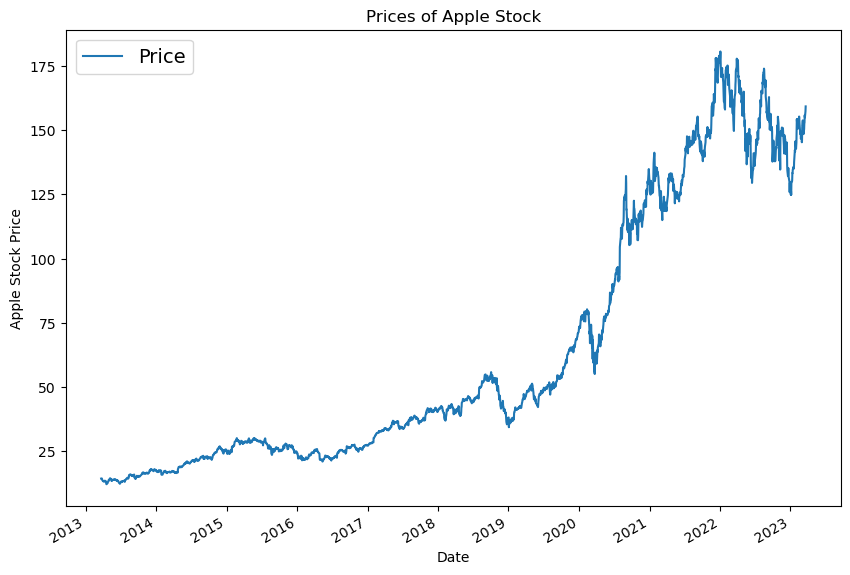

In [162]:
# Plot the data
import matplotlib.pyplot as plt
apple_stock.plot(figsize=(10, 7))
plt.ylabel("Apple Stock Price")
plt.title("Prices of Apple Stock")
plt.legend(fontsize=14);

In [163]:
import csv
from datetime import datetime
import os

timesteps = []
apple_stock_prices = []
filepath = os.path.join(os.getcwd(), 'data', 'stock_AAPL_data.csv')
with open(filepath) as f:
    csv_reader = csv.reader(f, delimiter=",") # read in the target CSV
    next(csv_reader) # skip first line (this gets rid of the column titles)
    for line in csv_reader:
        # Remove the time zone offset and microseconds
        datetime_str = line[0][:-6]
        # Parse the datetime string using the updated format string
        timesteps.append(datetime.strptime(datetime_str, "%Y-%m-%d %H:%M:%S"))
        apple_stock_prices.append(float(line[1])) # get the prices as floats (not strings)

# View first 10 of each
print(timesteps[:10], apple_stock_prices[:10])




[datetime.datetime(2013, 3, 22, 0, 0), datetime.datetime(2013, 3, 25, 0, 0), datetime.datetime(2013, 3, 26, 0, 0), datetime.datetime(2013, 3, 27, 0, 0), datetime.datetime(2013, 3, 28, 0, 0), datetime.datetime(2013, 4, 1, 0, 0), datetime.datetime(2013, 4, 2, 0, 0), datetime.datetime(2013, 4, 3, 0, 0), datetime.datetime(2013, 4, 4, 0, 0), datetime.datetime(2013, 4, 5, 0, 0)] [14.24796199798584, 14.299476623535156, 14.22420883178711, 13.944746017456055, 13.654182434082031, 13.230053901672363, 13.257195472717285, 13.325057029724121, 13.193346977233887, 13.053925514221191]


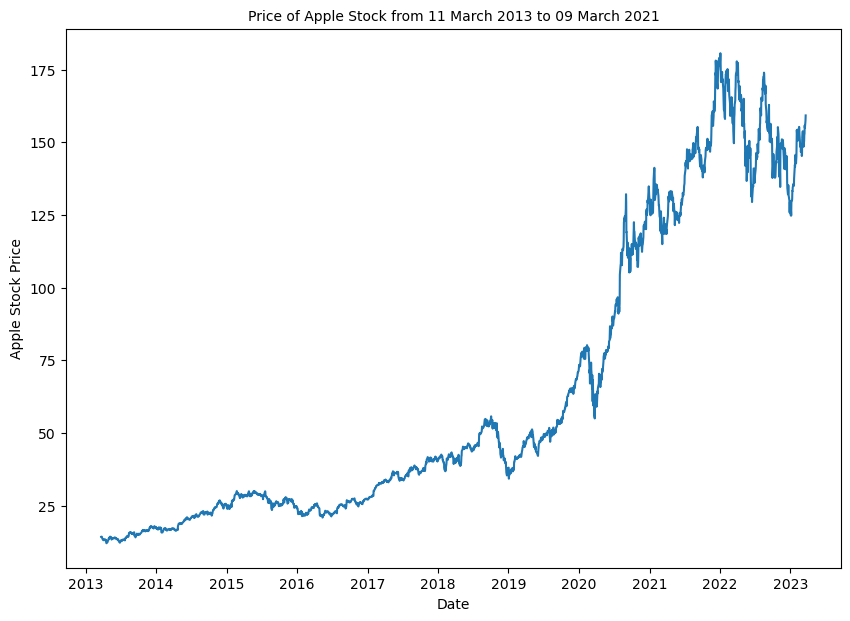

In [164]:
# Plot from CSV
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 7))
plt.plot(timesteps, apple_stock_prices)
plt.title("Price of Apple Stock from 11 March 2013 to 09 March 2021", fontsize=10)
plt.xlabel("Date")
plt.ylabel("Apple Stock Price");

In [165]:
# Get apple stock data array

timesteps = apple_stock.index.to_numpy()
prices = apple_stock['Price'].to_numpy()
timesteps[:10], prices[:10]

(array([datetime.datetime(2013, 3, 22, 0, 0, tzinfo=tzoffset(None, -14400)),
        datetime.datetime(2013, 3, 25, 0, 0, tzinfo=tzoffset(None, -14400)),
        datetime.datetime(2013, 3, 26, 0, 0, tzinfo=tzoffset(None, -14400)),
        datetime.datetime(2013, 3, 27, 0, 0, tzinfo=tzoffset(None, -14400)),
        datetime.datetime(2013, 3, 28, 0, 0, tzinfo=tzoffset(None, -14400)),
        datetime.datetime(2013, 4, 1, 0, 0, tzinfo=tzoffset(None, -14400)),
        datetime.datetime(2013, 4, 2, 0, 0, tzinfo=tzoffset(None, -14400)),
        datetime.datetime(2013, 4, 3, 0, 0, tzinfo=tzoffset(None, -14400)),
        datetime.datetime(2013, 4, 4, 0, 0, tzinfo=tzoffset(None, -14400)),
        datetime.datetime(2013, 4, 5, 0, 0, tzinfo=tzoffset(None, -14400))],
       dtype=object),
 array([14.247962  , 14.29947662, 14.22420883, 13.94474602, 13.65418243,
        13.2300539 , 13.25719547, 13.32505703, 13.19334698, 13.05392551]))

In [166]:
# Time series split

# Create train and test splits the right way for time series data
split_size = int(0.8 * len(prices)) # 80% train, 20% test

# Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data splits (everything after the split)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2013, 504, 2013, 504)

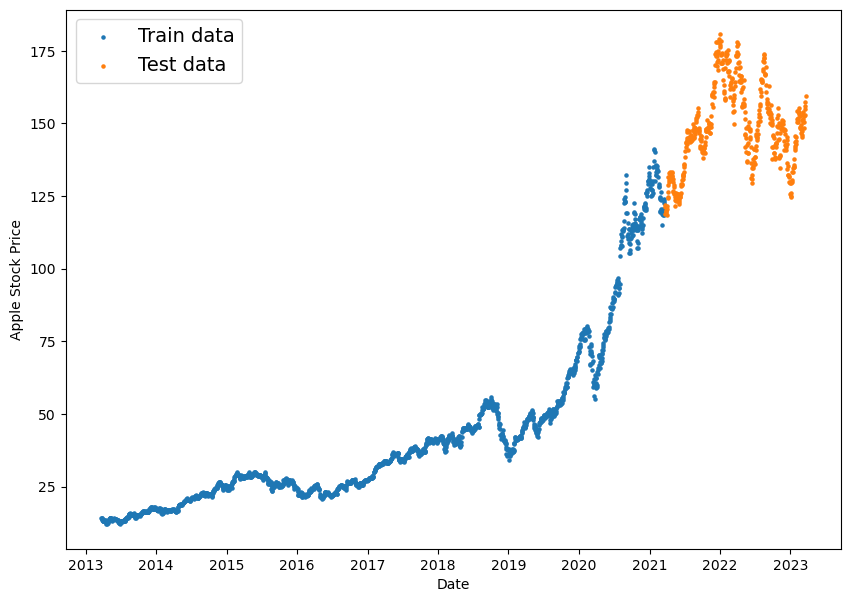

In [167]:
# Plot correctly made splits

plt.figure(figsize=(10,7))
plt.scatter(X_train,y_train, s=5,label = "Train data")
plt.scatter(X_test,y_test, s=5,label = "Test data")
plt.xlabel("Date")
plt.ylabel("Apple Stock Price")
plt.legend(fontsize = 14)
plt.show();

In [168]:
# Create a function to plot time series data

def  plot_time_series(timesteps, values, format = '.', start = 0, end = None, label = None):
    """
    Plots a timesteps (a series of points in time) against values (a series of values across timesteps).
  
    Parameters
    ---------
    timesteps : array of timesteps
    values : array of values across time
    format : style of plot, default "."
    start : where to start the plot (setting a value will index from start of timesteps & values)
    end : where to end the plot (setting a value will index from end of timesteps & values)
    label : label to show on plot of values
    """
    
    # Plot the series
    plt.plot(timesteps[start:end], values[start:end], format, label = label)
    plt.xlabel("Time")
    plt.ylabel("Apple Stock Price")
    if label:
        plt.legend(fontsize = 14) # make label bigger
    plt.grid(True)


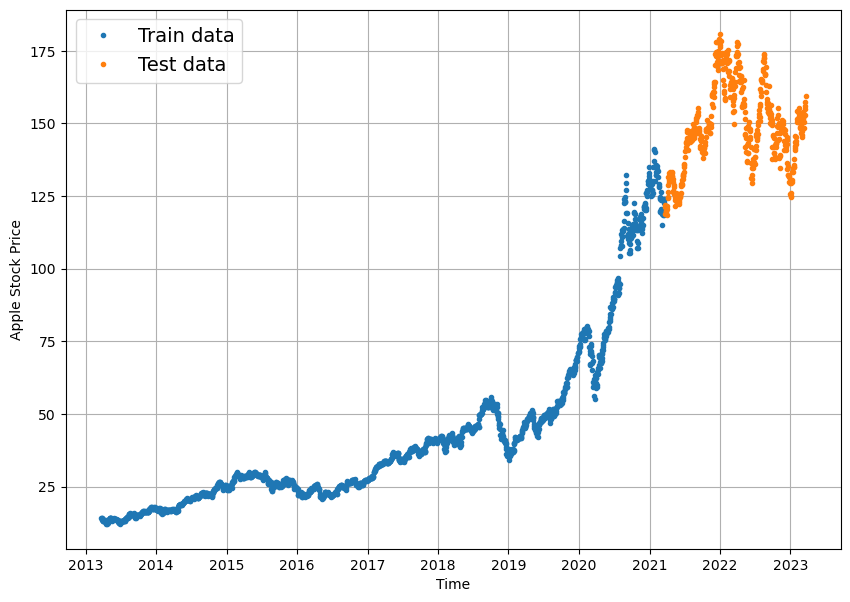

In [169]:
# Try out our plotting function:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

## Modelling Experiments

### Model 0: Naive forecast

In [170]:
# Create a naïve forecast
"""
This code creates a naive forecast for a time series 
by copying all elements of y_test except for the last one.

The resulting naive_forecast is a tensor that contains the same values as y_test, 
but shifted by one time step. 

That is, the first element of naive_forecast is the same as the second element of y_test, 
the second element of naive_forecast is the same as the third element of y_test, and so on. 

The last element of naive_forecast is the same as the second-to-last element of y_test.

The purpose of creating a naive forecast is to provide a baseline for comparing the performance 
of a more sophisticated forecasting model. By comparing the performance of the model against the naive forecast, 
we can determine whether the model is providing a significant improvement in prediction accuracy.

"""

naive_forecast = y_test[:-1] # Naive forecast equals every value excluding the last value
naive_forecast[:10], naive_forecast[-10:]

(array([121.92238617, 121.08250427, 118.66165161, 119.15570068,
        119.76831818, 119.94618988, 118.47390747, 120.69714355,
        121.53703308, 124.40254974]),
 array([151.6000061 , 152.86999512, 150.58999634, 148.5       ,
        150.47000122, 152.58999634, 152.99000549, 155.8500061 ,
        155.        , 157.3999939 ]))

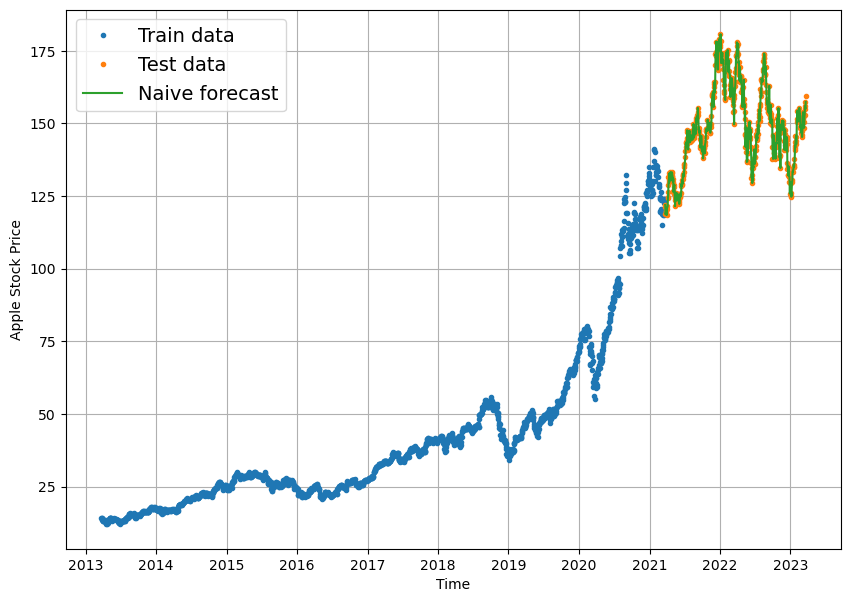

In [171]:
# Plot naive forecast
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", label="Naive forecast");

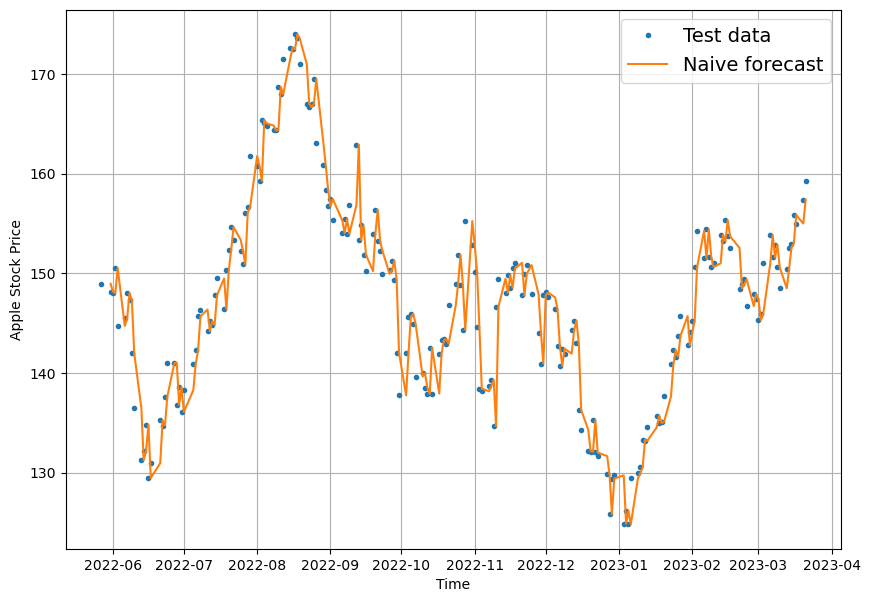

In [172]:
plt.figure(figsize=(10, 7))
offset = 300 # offset the values by 300 timesteps 
plot_time_series(timesteps=X_test, values=y_test, start=offset, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", start=offset, label="Naive forecast");

### Evaluating a time series model

In [173]:
# Let's get TensorFlow! 
import tensorflow as tf

In [174]:
# MASE implemented courtesy of sktime - https://github.com/alan-turing-institute/sktime/blob/ee7a06843a44f4aaec7582d847e36073a9ab0566/sktime/performance_metrics/forecasting/_functions.py#L16
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shifting of 1 day)

  return mae / mae_naive_no_season

In [175]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) # puts and emphasis on outliers (all errors get squared)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)
  
  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [176]:
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)
naive_results

{'mae': 2.140102,
 'mse': 7.9698024,
 'rmse': 2.8230839,
 'mape': 1.4344069,
 'mase': 0.99879116}

In [177]:
# Find average price of Apple Stocks in test dataset
tf.reduce_mean(y_test).numpy()

148.72193727039155

### Windowing dataset

In [178]:
HORIZON = 1 # predict 1 step at a time
WINDOW_SIZE = 7 # use a week worth of timesteps to predict the horizon

In [179]:
# Create function to label windowed data
def get_labelled_windows(x, horizon=1):
  """
  Creates labels for windowed dataset.

  E.g. if horizon=1 (default)
  Input: [1, 2, 3, 4, 5, 6] -> Output: ([1, 2, 3, 4, 5], [6])
  """
  return x[:, :-horizon], x[:, -horizon:]

In [180]:
# Test out the window labelling function
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1, axis=0), horizon=HORIZON)
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [1 2 3 4 5 6 7] -> Label: 8


In [181]:
test_window.shape, test_label.shape

(TensorShape([1, 7]), TensorShape([1, 1]))

In [182]:
# Create function to view NumPy arrays as windows 
def make_windows(x, window_size=7, horizon=1):
  """
  Turns a 1D array into a 2D array of sequential windows of window_size.
  """
  # 1. Create a window of specific window_size (add the horizon on the end for later labelling)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  # print(f"Window step:\n {window_step}")

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  # print(f"Window indexes:\n {window_indexes[:3], window_indexes[-3:], window_indexes.shape}")

  # 3. Index on the target array (time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

In [183]:
7 + np.expand_dims(3,axis=0)

array([10])

In [184]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2510, 2510)

In [185]:
full_windows.shape, full_labels.shape

((2510, 7), (2510, 1))

In [186]:
# View the first 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [14.247962   14.29947662 14.22420883 13.94474602 13.65418243 13.2300539
 13.25719547] -> Label: [13.32505703]
Window: [14.29947662 14.22420883 13.94474602 13.65418243 13.2300539  13.25719547
 13.32505703] -> Label: [13.19334698]
Window: [14.22420883 13.94474602 13.65418243 13.2300539  13.25719547 13.32505703
 13.19334698] -> Label: [13.05392551]


In [187]:
# View the last 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i-3]} -> Label: {full_labels[i-3]}")

Window: [152.86999512 150.58999634 148.5        150.47000122 152.58999634
 152.99000549 155.8500061 ] -> Label: [155.]
Window: [150.58999634 148.5        150.47000122 152.58999634 152.99000549
 155.8500061  155.        ] -> Label: [157.3999939]
Window: [148.5        150.47000122 152.58999634 152.99000549 155.8500061
 155.         157.3999939 ] -> Label: [159.27999878]


In [188]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [189]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2008, 502, 2008, 502)

In [190]:
train_windows[:5], train_labels[:5]

(array([[14.247962  , 14.29947662, 14.22420883, 13.94474602, 13.65418243,
         13.2300539 , 13.25719547],
        [14.29947662, 14.22420883, 13.94474602, 13.65418243, 13.2300539 ,
         13.25719547, 13.32505703],
        [14.22420883, 13.94474602, 13.65418243, 13.2300539 , 13.25719547,
         13.32505703, 13.19334698],
        [13.94474602, 13.65418243, 13.2300539 , 13.25719547, 13.32505703,
         13.19334698, 13.05392551],
        [13.65418243, 13.2300539 , 13.25719547, 13.32505703, 13.19334698,
         13.05392551, 13.14676857]]),
 array([[13.32505703],
        [13.19334698],
        [13.05392551],
        [13.14676857],
        [13.17052078]]))

In [191]:
# Check to see if same (accounting for horizon and window size)
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

True

In [192]:
len(np.squeeze(train_labels[:-HORIZON-1])), len( y_train[WINDOW_SIZE:])

(2006, 2006)

In [193]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename 
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), # create filepath to save model
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True) # save only the best model to file

### Model 1: Dense model (window = 7, horizon = 1)

In [194]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# Construct model
model_1 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear") # linear activation is the same as having no activation                        
], name="model_1_dense") # give the model a name so we can save it

# Compile model
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"]) # we don't necessarily need this when the loss function is already MAE

# Fit model
model_1.fit(x=train_windows, # train windows of 7 timesteps of Apple stock prices
            y=train_labels, # horizon value of 1 (using the previous 7 timesteps to predict next day)
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)]) # create ModelCheckpoint callback to save best model

Epoch 1/100
16/16 [==============================] - 0s 9ms/step - loss: 10.2950 - mae: 10.2950 - val_loss: 17.0276 - val_mae: 17.0276
INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


Epoch 2/100
16/16 [==============================] - 0s 3ms/step - loss: 2.3281 - mae: 2.3281 - val_loss: 4.1421 - val_mae: 4.1421
INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


Epoch 3/100
16/16 [==============================] - 0s 3ms/step - loss: 1.1858 - mae: 1.1858 - val_loss: 4.3038 - val_mae: 4.3038
Epoch 4/100
16/16 [==============================] - 0s 3ms/step - loss: 1.0724 - mae: 1.0724 - val_loss: 3.9789 - val_mae: 3.9789
INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


Epoch 5/100
16/16 [==============================] - 0s 3ms/step - loss: 0.9640 - mae: 0.9640 - val_loss: 3.5080 - val_mae: 3.5080
INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


Epoch 6/100
16/16 [==============================] - 0s 3ms/step - loss: 0.9463 - mae: 0.9463 - val_loss: 3.5225 - val_mae: 3.5225
Epoch 7/100
16/16 [==============================] - 0s 3ms/step - loss: 0.9391 - mae: 0.9391 - val_loss: 3.5769 - val_mae: 3.5769
Epoch 8/100
16/16 [==============================] - 0s 3ms/step - loss: 0.9329 - mae: 0.9329 - val_loss: 3.4559 - val_mae: 3.4559
INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


Epoch 9/100
16/16 [==============================] - 0s 3ms/step - loss: 0.9215 - mae: 0.9215 - val_loss: 3.5764 - val_mae: 3.5764
Epoch 10/100
16/16 [==============================] - 0s 3ms/step - loss: 0.9165 - mae: 0.9165 - val_loss: 3.4706 - val_mae: 3.4706
Epoch 11/100
16/16 [==============================] - 0s 3ms/step - loss: 0.9137 - mae: 0.9137 - val_loss: 3.5185 - val_mae: 3.5185
Epoch 12/100
16/16 [==============================] - 0s 3ms/step - loss: 0.9325 - mae: 0.9325 - val_loss: 3.6706 - val_mae: 3.6706
Epoch 13/100
16/16 [==============================] - 0s 3ms/step - loss: 0.9037 - mae: 0.9037 - val_loss: 3.3520 - val_mae: 3.3520
INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


Epoch 14/100
16/16 [==============================] - 0s 3ms/step - loss: 0.8979 - mae: 0.8979 - val_loss: 3.3116 - val_mae: 3.3116
INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


Epoch 15/100
16/16 [==============================] - 0s 3ms/step - loss: 0.8801 - mae: 0.8801 - val_loss: 3.3997 - val_mae: 3.3997
Epoch 16/100
16/16 [==============================] - 0s 3ms/step - loss: 0.8810 - mae: 0.8810 - val_loss: 3.2872 - val_mae: 3.2872
INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


Epoch 17/100
16/16 [==============================] - 0s 3ms/step - loss: 0.8716 - mae: 0.8716 - val_loss: 3.2375 - val_mae: 3.2375
INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


Epoch 18/100
16/16 [==============================] - 0s 3ms/step - loss: 0.8613 - mae: 0.8613 - val_loss: 3.5891 - val_mae: 3.5891
Epoch 19/100
16/16 [==============================] - 0s 3ms/step - loss: 0.8597 - mae: 0.8597 - val_loss: 3.1907 - val_mae: 3.1907
INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


Epoch 20/100
16/16 [==============================] - 0s 3ms/step - loss: 0.8520 - mae: 0.8520 - val_loss: 3.1587 - val_mae: 3.1587
INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


Epoch 21/100
16/16 [==============================] - 0s 3ms/step - loss: 0.8612 - mae: 0.8612 - val_loss: 3.1460 - val_mae: 3.1460
INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


Epoch 22/100
16/16 [==============================] - 0s 3ms/step - loss: 0.8452 - mae: 0.8452 - val_loss: 3.4190 - val_mae: 3.4190
Epoch 23/100
16/16 [==============================] - 0s 3ms/step - loss: 0.8457 - mae: 0.8457 - val_loss: 3.5179 - val_mae: 3.5179
Epoch 24/100
16/16 [==============================] - 0s 3ms/step - loss: 0.8349 - mae: 0.8349 - val_loss: 3.2350 - val_mae: 3.2350
Epoch 25/100
16/16 [==============================] - 0s 3ms/step - loss: 0.8202 - mae: 0.8202 - val_loss: 3.4078 - val_mae: 3.4078
Epoch 26/100
16/16 [==============================] - 0s 3ms/step - loss: 0.8313 - mae: 0.8313 - val_loss: 3.3329 - val_mae: 3.3329
Epoch 27/100
16/16 [==============================] - 0s 3ms/step - loss: 0.8122 - mae: 0.8122 - val_loss: 3.0012 - val_mae: 3.0012
INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


Epoch 28/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7962 - mae: 0.7962 - val_loss: 3.1290 - val_mae: 3.1290
Epoch 29/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7939 - mae: 0.7939 - val_loss: 3.0055 - val_mae: 3.0055
Epoch 30/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7844 - mae: 0.7844 - val_loss: 2.9219 - val_mae: 2.9219
INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


Epoch 31/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7845 - mae: 0.7845 - val_loss: 3.1685 - val_mae: 3.1685
Epoch 32/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7966 - mae: 0.7966 - val_loss: 2.9645 - val_mae: 2.9645
Epoch 33/100
16/16 [==============================] - 0s 3ms/step - loss: 0.8154 - mae: 0.8154 - val_loss: 2.8999 - val_mae: 2.8999
INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


Epoch 34/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7896 - mae: 0.7896 - val_loss: 3.2633 - val_mae: 3.2633
Epoch 35/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7823 - mae: 0.7823 - val_loss: 2.8486 - val_mae: 2.8486
INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


Epoch 36/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7794 - mae: 0.7794 - val_loss: 2.8598 - val_mae: 2.8598
Epoch 37/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7686 - mae: 0.7686 - val_loss: 2.8143 - val_mae: 2.8143
INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


Epoch 38/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7631 - mae: 0.7631 - val_loss: 2.8125 - val_mae: 2.8125
INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


Epoch 39/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7272 - mae: 0.7272 - val_loss: 2.8182 - val_mae: 2.8182
Epoch 40/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7364 - mae: 0.7364 - val_loss: 2.7279 - val_mae: 2.7279
INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


Epoch 41/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7274 - mae: 0.7274 - val_loss: 2.7395 - val_mae: 2.7395
Epoch 42/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7689 - mae: 0.7689 - val_loss: 3.3857 - val_mae: 3.3857
Epoch 43/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7444 - mae: 0.7444 - val_loss: 2.8032 - val_mae: 2.8032
Epoch 44/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7273 - mae: 0.7273 - val_loss: 2.6724 - val_mae: 2.6724
INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


Epoch 45/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7032 - mae: 0.7032 - val_loss: 2.6600 - val_mae: 2.6600
INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


Epoch 46/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7524 - mae: 0.7524 - val_loss: 2.7959 - val_mae: 2.7959
Epoch 47/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7308 - mae: 0.7308 - val_loss: 2.9015 - val_mae: 2.9015
Epoch 48/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7285 - mae: 0.7285 - val_loss: 2.6310 - val_mae: 2.6310
INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


Epoch 49/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6909 - mae: 0.6909 - val_loss: 2.6145 - val_mae: 2.6145
INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


Epoch 50/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6934 - mae: 0.6934 - val_loss: 2.6005 - val_mae: 2.6005
INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


Epoch 51/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7162 - mae: 0.7162 - val_loss: 2.7851 - val_mae: 2.7851
Epoch 52/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7201 - mae: 0.7201 - val_loss: 2.5705 - val_mae: 2.5705
INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


Epoch 53/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7305 - mae: 0.7305 - val_loss: 2.5691 - val_mae: 2.5691
INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


Epoch 54/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6957 - mae: 0.6957 - val_loss: 2.6165 - val_mae: 2.6165
Epoch 55/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6848 - mae: 0.6848 - val_loss: 2.5656 - val_mae: 2.5656
INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


Epoch 56/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6834 - mae: 0.6834 - val_loss: 2.6610 - val_mae: 2.6610
Epoch 57/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7170 - mae: 0.7170 - val_loss: 3.0559 - val_mae: 3.0559
Epoch 58/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7130 - mae: 0.7130 - val_loss: 2.6968 - val_mae: 2.6968
Epoch 59/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6932 - mae: 0.6932 - val_loss: 2.5716 - val_mae: 2.5716
Epoch 60/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6814 - mae: 0.6814 - val_loss: 2.5867 - val_mae: 2.5867
Epoch 61/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6800 - mae: 0.6800 - val_loss: 2.5187 - val_mae: 2.5187
INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


Epoch 62/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6697 - mae: 0.6697 - val_loss: 2.5026 - val_mae: 2.5026
INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


Epoch 63/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6819 - mae: 0.6819 - val_loss: 2.4980 - val_mae: 2.4980
INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


Epoch 64/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6761 - mae: 0.6761 - val_loss: 2.5960 - val_mae: 2.5960
Epoch 65/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6775 - mae: 0.6775 - val_loss: 2.4634 - val_mae: 2.4634
INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


Epoch 66/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6610 - mae: 0.6610 - val_loss: 2.5971 - val_mae: 2.5971
Epoch 67/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6513 - mae: 0.6513 - val_loss: 2.4494 - val_mae: 2.4494
INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


Epoch 68/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6518 - mae: 0.6518 - val_loss: 2.5806 - val_mae: 2.5806
Epoch 69/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6775 - mae: 0.6775 - val_loss: 2.4889 - val_mae: 2.4889
Epoch 70/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6540 - mae: 0.6540 - val_loss: 2.4935 - val_mae: 2.4935
Epoch 71/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6732 - mae: 0.6732 - val_loss: 2.4886 - val_mae: 2.4886
Epoch 72/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6413 - mae: 0.6413 - val_loss: 2.4552 - val_mae: 2.4552
Epoch 73/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6462 - mae: 0.6462 - val_loss: 2.5140 - val_mae: 2.5140
Epoch 74/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6918 - mae: 0.6918 - val_loss: 3.0548 - val_mae: 3.0548
Epoch 75/100
16/16 [==============================] - 0s 3ms/step - loss: 0.

INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


Epoch 76/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6777 - mae: 0.6777 - val_loss: 2.4083 - val_mae: 2.4083
INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


Epoch 77/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6511 - mae: 0.6511 - val_loss: 2.4588 - val_mae: 2.4588
Epoch 78/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6434 - mae: 0.6434 - val_loss: 2.5302 - val_mae: 2.5302
Epoch 79/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6439 - mae: 0.6439 - val_loss: 2.5860 - val_mae: 2.5860
Epoch 80/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6614 - mae: 0.6614 - val_loss: 2.3921 - val_mae: 2.3921
INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


Epoch 81/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6491 - mae: 0.6491 - val_loss: 2.5095 - val_mae: 2.5095
Epoch 82/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6474 - mae: 0.6474 - val_loss: 2.4597 - val_mae: 2.4597
Epoch 83/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6354 - mae: 0.6354 - val_loss: 2.4606 - val_mae: 2.4606
Epoch 84/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6471 - mae: 0.6471 - val_loss: 2.4771 - val_mae: 2.4771
Epoch 85/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6338 - mae: 0.6338 - val_loss: 2.6966 - val_mae: 2.6966
Epoch 86/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6812 - mae: 0.6812 - val_loss: 2.4630 - val_mae: 2.4630
Epoch 87/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6495 - mae: 0.6495 - val_loss: 2.5658 - val_mae: 2.5658
Epoch 88/100
16/16 [==============================] - 0s 3ms/step - loss: 0.

INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


Epoch 92/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6770 - mae: 0.6770 - val_loss: 2.8614 - val_mae: 2.8614
Epoch 93/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6640 - mae: 0.6640 - val_loss: 2.5431 - val_mae: 2.5431
Epoch 94/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6804 - mae: 0.6804 - val_loss: 2.3548 - val_mae: 2.3548
INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


Epoch 95/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6712 - mae: 0.6712 - val_loss: 2.3532 - val_mae: 2.3532
INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


Epoch 96/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6186 - mae: 0.6186 - val_loss: 2.3495 - val_mae: 2.3495
INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


Epoch 97/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6296 - mae: 0.6296 - val_loss: 2.3540 - val_mae: 2.3540
Epoch 98/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6342 - mae: 0.6342 - val_loss: 2.4008 - val_mae: 2.4008
Epoch 99/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6362 - mae: 0.6362 - val_loss: 2.3661 - val_mae: 2.3661
Epoch 100/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6443 - mae: 0.6443 - val_loss: 2.3405 - val_mae: 2.3405
INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


In [195]:
# Evaluate model on test data
model_1.evaluate(test_windows, test_labels)

16/16 [==============================] - 0s 1ms/step - loss: 2.3405 - mae: 2.3405


[2.3404719829559326, 2.3404719829559326]

In [196]:
# Load in saved best performing model_1 and evaluate on test data
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense")
model_1.evaluate(test_windows, test_labels)

16/16 [==============================] - 0s 1ms/step - loss: 2.3405 - mae: 2.3405


[2.3404719829559326, 2.3404719829559326]

In [197]:
def make_preds(model, input_data):
  """
  Uses model to make predictions on input_data.

  Parameters
  ----------
  model: trained model 
  input_data: windowed input data (same kind of data model was trained on)

  Returns model predictions on input_data.
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # return 1D array of predictions

In [198]:
# Make predictions using model_1 on the test dataset and view the results
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

(502,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([120.952835, 119.775696, 119.71713 , 119.77084 , 119.73225 ,
        119.21878 , 120.36546 , 121.25604 , 123.40871 , 124.63835 ],
       dtype=float32)>)

In [199]:
# Evaluate preds
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels), # reduce to right shape
                                 y_pred=model_1_preds)
model_1_results

{'mae': 2.340472,
 'mse': 9.130511,
 'rmse': 3.0216734,
 'mape': 1.5657326,
 'mase': 1.0925877}

In [200]:
naive_results

{'mae': 2.140102,
 'mse': 7.9698024,
 'rmse': 2.8230839,
 'mape': 1.4344069,
 'mase': 0.99879116}

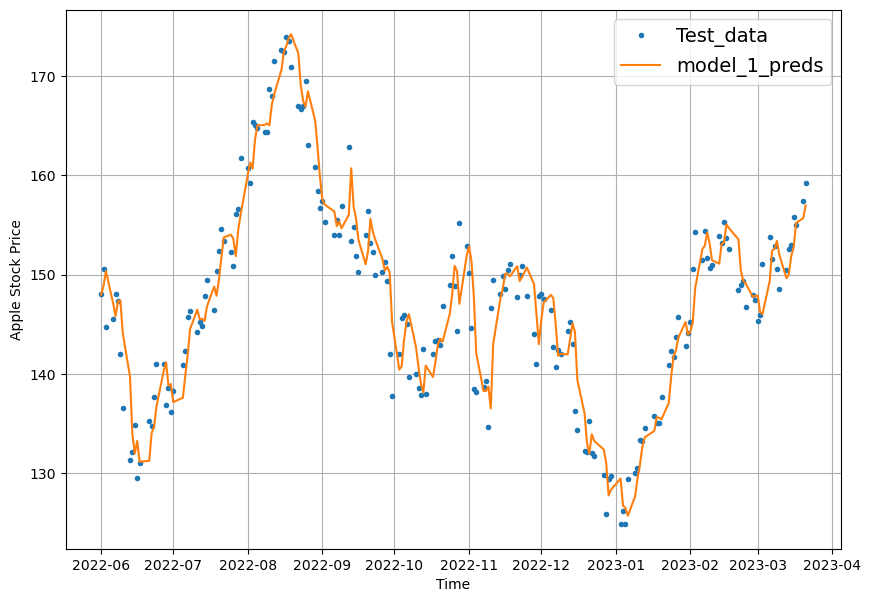

In [201]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels, start=offset, label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_1_preds, start=offset, format="-", label="model_1_preds")

### Model 2: Dense (windows = 30, horizon = 1)

In [202]:
HORIZON = 1
WINDOW_SIZE = 30

In [203]:
# Make windowed data with appropriate horizon and window sizes
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
print(f'full_windows : {len(full_windows)}')
print(f'full_labels : {len(full_labels)}')

full_windows : 2487
full_labels : 2487


In [204]:
# Make training and testing windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels)
print(f'train_windows : {len(train_windows)}')
print(f'train_labels : {len(train_labels)}')
print(f'test_windows : {len(test_windows)}')
print(f'test_labels : {len(test_labels)}')

train_windows : 1989
train_labels : 1989
test_windows : 498
test_labels : 498


In [205]:
tf.random.set_seed(42)

# Create model
model_2 = tf.keras.Sequential(
    [
        layers.Dense(128, activation="relu"),
        layers.Dense(HORIZON, activation="linear")
    ], name='model_2_dense'
)

model_2.compile(loss='mae', optimizer=tf.keras.optimizers.Adam()
                , metrics=['mae'])

model_2.fit(
    train_windows, train_labels,
    epochs=100, batch_size=128, verbose= 0, 
    validation_data= (test_windows, test_labels),
    callbacks=[create_model_checkpoint(model_name=model_2.name)]
    )

INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets


In [206]:
# Evaluation of model_2 predictions
model_2.evaluate(test_windows, test_labels)

16/16 [==============================] - 0s 1ms/step - loss: 4.9725 - mae: 4.9725


[4.9724650382995605, 4.9724650382995605]

In [207]:
# load in best performance model
model_2 = tf.keras.models.load_model('model_experiments/model_2_dense')
model_2.evaluate(test_windows, test_labels)

16/16 [==============================] - 0s 1ms/step - loss: 2.7961 - mae: 2.7961


[2.7960705757141113, 2.7960705757141113]

In [208]:
model_2_preds = make_preds(model_2, input_data= test_windows)

In [209]:
# Evaluate results for model 2 predictions
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_2_preds) # remove 1 dimension of test labels

model_2_results

{'mae': 2.7960706,
 'mse': 12.765066,
 'rmse': 3.5728233,
 'mape': 1.8680123,
 'mase': 1.298185}

Still worse than naive model!

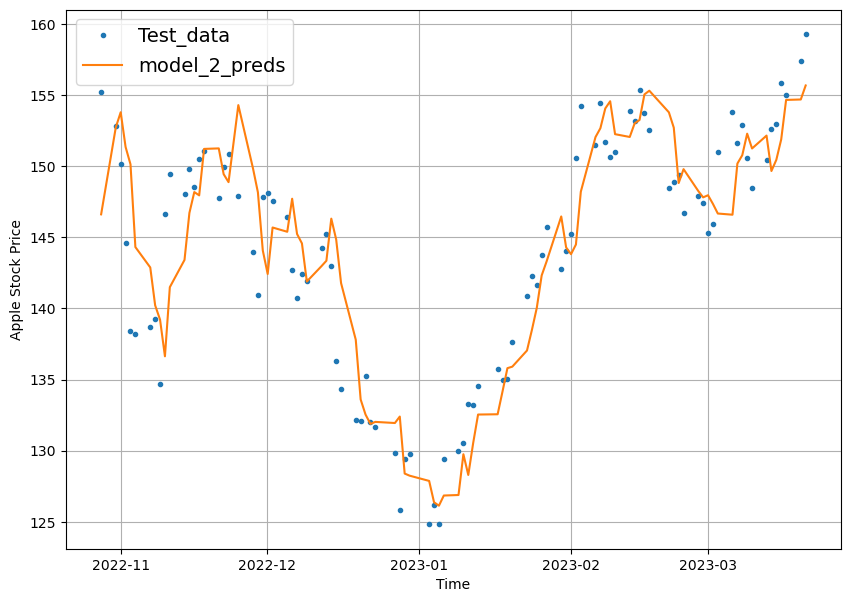

In [210]:
# Plot the prediction
offset = 400
plt.figure(figsize=(10, 7))
# Account for the test_windows offset
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels, start=offset, label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds, start=offset, format="-", label="model_2_preds")

### Model 3: Dense (window = 30, horizon = 7)
Let's try and predict 7 days ahead given the previous 30 days.

First, we'll update the HORIZON and WINDOW_SIZE variables and create windowed data.

In [211]:
HORIZON = 7
WINDOW_SIZE = 30

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2481, 2481)

In [212]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels)
(len(train_windows), len(train_labels)), (len(test_windows),len(test_labels))

((1984, 1984), (497, 497))

In [213]:
model_3 = tf.keras.Sequential(
    [
        layers.Dense(128, activation="relu"),
        layers.Dense(HORIZON, activation="linear")
    ], name="model_3_dense"
)

model_3.compile(
    loss= 'mae',
    optimizer=tf.keras.optimizers.Adam()
)

model_3.fit(
    train_windows, train_labels,
    batch_size=128,
    epochs=100,
    verbose=0,
    validation_data=(test_windows, test_labels),
    callbacks=[create_model_checkpoint(model_name=model_3.name)]
)

INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets


In [214]:
# How did our model with a larger window size and horizon go?
model_3.evaluate(test_windows,test_labels)

16/16 [==============================] - 0s 1ms/step - loss: 4.8261


4.826129913330078

In [215]:
# Load the best version of model_3 and evaluate
model_3 = tf.keras.models.load_model('model_experiments/model_3_dense')
model_3.evaluate(test_windows,test_labels)

16/16 [==============================] - 0s 1ms/step - loss: 4.7828


4.782802581787109

Even worse!!

In [216]:
model_3_preds = make_preds(model_3, test_windows)
model_3_preds[:10]

<tf.Tensor: shape=(10, 7), dtype=float32, numpy=
array([[120.58429 , 120.18848 , 120.45771 , 121.94274 , 121.46325 ,
        119.79638 , 121.54697 ],
       [121.312065, 123.11884 , 122.42843 , 122.34031 , 122.06366 ,
        120.89924 , 121.78572 ],
       [120.35637 , 119.70477 , 120.6679  , 120.2051  , 121.250336,
        120.10943 , 120.61658 ],
       [120.36387 , 120.45797 , 119.10769 , 118.61291 , 120.73081 ,
        119.685005, 121.55607 ],
       [119.640816, 120.070206, 118.77144 , 117.929016, 120.56214 ,
        120.58368 , 119.794716],
       [119.445595, 119.73283 , 119.33451 , 119.85864 , 121.19844 ,
        120.31873 , 119.9922  ],
       [120.42742 , 118.34908 , 119.50736 , 119.91721 , 121.01348 ,
        119.02566 , 119.54254 ],
       [120.12326 , 118.24435 , 117.66764 , 118.468735, 118.75719 ,
        118.52589 , 119.174515],
       [118.67749 , 117.67203 , 119.61132 , 119.32756 , 120.22015 ,
        120.92246 , 119.31111 ],
       [120.44338 , 119.39456 , 123.17604 

In [217]:
# Calculate model_3 results - these are going to be multi-dimensional because
# we're trying to predict more than one step at a time.
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': array([ 1.3129752 ,  2.2440457 ,  1.354841  ,  1.7859857 ,  3.1407166 ,
         3.8671634 ,  5.7384467 ,  7.9960318 ,  8.926531  ,  7.135595  ,
         7.760226  ,  7.6185794 ,  5.897777  ,  3.5276468 ,  3.770499  ,
         1.8011322 ,  1.2497188 ,  1.1409236 ,  1.5123051 ,  1.6118251 ,
         1.2200644 ,  1.9052145 ,  1.5651659 ,  1.9644165 ,  3.5259802 ,
         4.2625985 ,  3.4930801 ,  5.0274353 ,  4.7717004 ,  6.262051  ,
         4.8524575 ,  3.4154706 ,  3.5891593 ,  4.8239694 ,  3.3395593 ,
         2.3157022 ,  1.2790385 ,  0.9196254 ,  0.9257355 ,  1.3156728 ,
         2.1293018 ,  1.7739508 ,  1.3046886 ,  0.8808888 ,  1.3493587 ,
         0.8220891 ,  0.9275611 ,  1.1459177 ,  1.7109004 ,  1.1546065 ,
         0.9073247 ,  2.7216809 ,  3.224872  ,  3.3315582 ,  3.0724258 ,
         3.7163806 ,  4.2921624 ,  4.871554  ,  3.6674914 ,  3.3512769 ,
         3.6453617 ,  3.1554248 ,  2.534886  ,  3.0588162 ,  2.3798392 ,
         3.031784  ,  3.9209769 ,  4.9702454

The outputs for model_3_results are multi-dimensional. This is because the predictions are getting evaluated across the HORIZON timesteps (7 predictions at a time).
To fix this, let's adjust our evaluate_preds() function to work with multiple shapes of data.

In [218]:
def evaluate_preds(y_true, y_pred):
    # Make sure float32 (for metric calculations)
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)
    
    # Calculate various matrics
    mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
    mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
    mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
    rmse = tf.sqrt(mse)
    mase = mean_absolute_scaled_error(y_true, y_pred)
    
    # For different sized matrcis (for larger horizons, reduce to single number)
    if mae.ndim>0 : # if mae isn't already a scalar, reduce it to one by aggregating tensors to mean
        mae = tf.reduce_mean(mae)
        mse = tf.reduce_mean(mse)
        rmse = tf.reduce_mean(mape)
        mape = tf.reduce_mean(mape)
        mase = tf.reduce_mean(mase)
        
    return {"mae": mae.numpy(),
            "mse": mse.numpy(),
            "rmse": rmse.numpy(),
            "mape": mape.numpy(),
            "mase": mase.numpy()
    }

In [219]:
# get model_3 results aggregated to single values 
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels), y_pred=model_3_preds)
model_3_results

{'mae': 4.782803,
 'mse': 36.56654,
 'rmse': 3.2009091,
 'mape': 3.2009091,
 'mase': 2.2241747}

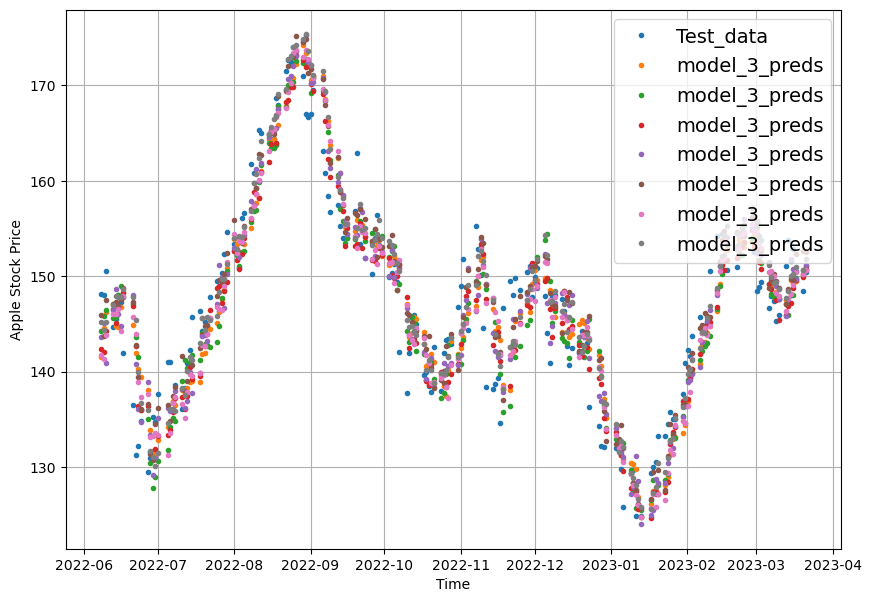

In [220]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
# Checking the shape of model_3_preds results in [n_test_samples, HORIZON] (this will screw up the plot)
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_3_preds, start=offset, label="model_3_preds")

Note: Aggregating the predictions (e.g. reducing a 7-day horizon to one value such as the mean) loses information from the original prediction. As in, the model predictions were trained to be made for 7-days but by reducing them to one, we gain the ability to plot them visually but we lose the extra information contained across multiple days.

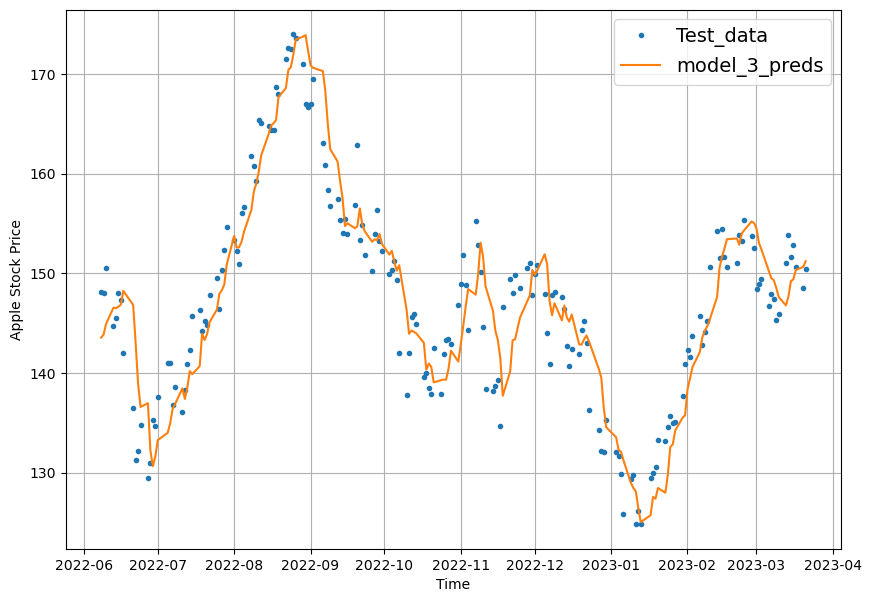

In [221]:
offset = 300
plt.figure(figsize=(10, 7))
# Plot model_3_preds by aggregating them (note: this condenses information so the preds will look fruther ahead than the test data)
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=test_labels[:, 0], 
                 start=offset, 
                 label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=tf.reduce_mean(model_3_preds, axis=1), 
                 format="-",
                 start=offset, 
                 label="model_3_preds")

### Which of our models is performing best so far?
So far, we've trained 3 models which use the same architecture but use different data inputs.

Let's compare them with the naïve model to see which model is performing the best so far

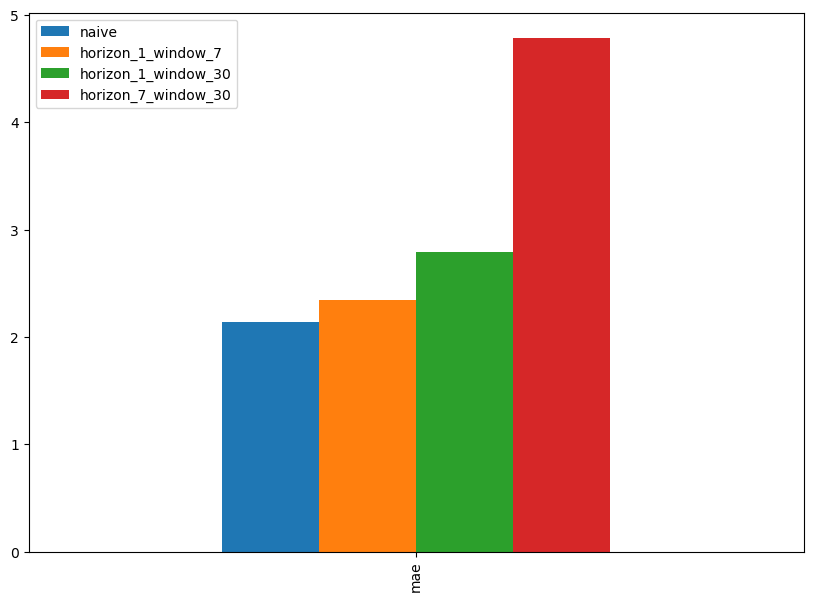

In [222]:
pd.DataFrame({"naive": naive_results["mae"], 
              "horizon_1_window_7": model_1_results["mae"], 
              "horizon_1_window_30": model_2_results["mae"], 
              "horizon_7_window_30": model_3_results["mae"]}, index=["mae"]).plot(figsize=(10, 7), kind="bar");

### Model 4: Conv1D

In [223]:
HORIZON = 1 # predict next day
WINDOW_SIZE = 7 # use previous week worth of data

In [224]:
# Create windowed dataset
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2510, 2510)

In [225]:
# Create train/test splits
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2008, 502, 2008, 502)

In [226]:
# Check data sample shapes
train_windows[0].shape # returns (WINDOW_SIZE, )

(7,)

In [227]:
# Before we pass our data to the Conv1D layer, we have to reshape it in order to make sure it works
x = tf.constant(train_windows[0])
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1)) # add an extra dimension for timesteps
print(f"Original shape: {x.shape}") # (WINDOW_SIZE)
print(f"Expanded shape: {expand_dims_layer(x).shape}") # (WINDOW_SIZE, input_dim) 
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[14.247962]
 [14.299477]
 [14.224209]
 [13.944746]
 [13.654182]
 [13.230054]
 [13.257195]]


In [228]:
tf.random.set_seed(42)

# Create model
model_4 = tf.keras.Sequential([
  # Create Lambda layer to reshape inputs, without this layer, the model will error
  layers.Lambda(lambda x: tf.expand_dims(x, axis=1)), # resize the inputs to adjust for window size / Conv1D 3D input requirements
  layers.Conv1D(filters=128, kernel_size=5, padding="causal", activation="relu"),
  layers.Dense(HORIZON)
], name="model_4_conv1D")

# Compile model
model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit model
model_4.fit(train_windows,
            train_labels,
            batch_size=128, 
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


In [229]:
model_4.summary()

Model: "model_4_conv1D"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_4 (Lambda)            (None, 1, 7)              0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1, 128)            4608      
_________________________________________________________________
dense_189 (Dense)            (None, 1, 1)              129       
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [230]:
# Load in best performing Conv1D model and evaluate it on the test data
model_4 = tf.keras.models.load_model("model_experiments/model_4_conv1D")
model_4.evaluate(test_windows, test_labels)

16/16 [==============================] - 0s 1ms/step - loss: 2.3910


2.3909575939178467

In [231]:
# Make predictions
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([121.00498 , 119.740685, 119.55048 , 119.836815, 119.93705 ,
       119.166885, 120.1463  , 121.1081  , 123.1195  , 124.291664],
      dtype=float32)>

In [232]:
# Evaluate predictions
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4_preds)
model_4_results

{'mae': 2.3909576,
 'mse': 9.451651,
 'rmse': 3.0743537,
 'mape': 1.5983969,
 'mase': 1.1161555}

### Model 5: RNN (LSTM)

In [233]:
tf.random.set_seed(42)

# Let's build an LSTM model with the Functional API
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs) # expand input dimension to be compatible with LSTM
# print(x.shape)
# x = layers.LSTM(128, activation="relu", return_sequences=True)(x) # this layer will error if the inputs are not the right shape
x = layers.LSTM(128, activation="relu", return_sequences=True)(x) # using the tanh loss function results in a massive error
# print(x.shape)
# Add another optional dense layer (you could add more of these to see if they improve model performance)
# x = layers.Dense(32, activation="relu")(x)
output = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs=inputs, outputs=output, name="model_5_lstm")

# Compile model
model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Seems when saving the model several warnings are appearing: https://github.com/tensorflow/tensorflow/issues/47554 
model_5.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=0,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])

INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_lstm\assets


In [234]:
# Load in best version of model 5 and evaluate on the test data
model_5 = tf.keras.models.load_model("model_experiments/model_5_lstm/")
model_5.evaluate(test_windows, test_labels)

16/16 [==============================] - 0s 2ms/step - loss: 2.1762


2.1762280464172363

In [235]:
# Make predictions with our LSTM model
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([121.853874, 119.30912 , 119.006096, 119.75002 , 120.52149 ,
       119.00393 , 120.274864, 121.70989 , 124.21563 , 125.00207 ],
      dtype=float32)>

In [236]:
# Evaluate model 5 preds
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_5_preds)
model_5_results

{'mae': 2.176228,
 'mse': 8.28747,
 'rmse': 2.8787966,
 'mape': 1.4568281,
 'mase': 1.0159147}

In [237]:
naive_results

{'mae': 2.140102,
 'mse': 7.9698024,
 'rmse': 2.8230839,
 'mape': 1.4344069,
 'mase': 0.99879116}

### Using N-BEAts Block


In [238]:
# Create NBeatsBlock custom layer
class NBeatsBlock(tf.keras.layers.Layer):
    def __init__(self, input_size: int,
                 theta_size : int,
                 horizon    : int,
                 n_neurons  : int,
                 n_layers   : int,
                 **kwargs): # **kwargs allows us to pass in extra arguments to the layer
        super().__init__(**kwargs) # pass extra arguments to the parent class
        self.input_size = input_size
        self.theta_size = theta_size
        self.horizon = horizon
        self.n_neurons = n_neurons
        self.n_layers = n_layers
        
        # Block contains stack of 4 fully connected layers each has ReLU activation
        self.hidden = [tf.keras.layers.Dense(units=n_neurons, activation="relu") for _ in range(n_layers)]
        # Output of block is a theta layer with linear activation
        self.theta_layer = tf.keras.layers.Dense(units=theta_size, activation="linear", name="theta_layer")
    
    def call(self, inputs): # the call method is what runs when the layer is called
        x = inputs
        for layer in self.hidden: # pass inputs through hidden layers
            x = layer(x)
        theta = self.theta_layer(x)
        # Output the backcast and forecast from the theta layer
        backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
        return backcast, forecast

In [239]:
# Setup dummy NBeatsBlock layer to represent inputs and outputs
dummy_block = NBeatsBlock(input_size=WINDOW_SIZE,
                          theta_size=WINDOW_SIZE+HORIZON, #backcast + forecast
                          horizon=HORIZON,
                          n_neurons=128,
                          n_layers=4)

In [240]:
# Create dummy inputs (haveto be the same size as input_size)
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE), axis=0) #input shape (1, WINDOW_SIZE)
#input shape to the model has to reflect the Dense layer input requirements (ndim=2)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[0, 1, 2, 3, 4, 5, 6]])>

In [241]:
# Pass dummy inputs through dummy NBeatsBlock layer
backcast, forecast = dummy_block(dummy_inputs)
# These are the backcast and forecast outputs of the theta layer (they will be random as we haven't trained the model yet)
print(f"Backcast:{tf.squeeze(backcast.numpy())}")
print(f"Forecast:{tf.squeeze(forecast.numpy())}")
print(f"Backcast shape:{backcast.shape}")
print(f"Forecast shape:{forecast.shape}")

Backcast:[-0.3058641   0.09077628 -0.302286    0.7218665  -0.2716761  -0.12324511
 -0.20270768]
Forecast:-0.3797554075717926
Backcast shape:(1, 7)
Forecast shape:(1, 1)


### Preparing data for the N-BEATS algorithm using `tf.data`

We've got the basic building block for the N-BEATS architecture ready to go.

But before we use it to replicate the entire N-BEATS generic architecture, let's create some data.

This time, because we're going to be using a larger model architecture, to ensure our model training runs as fast as possible, we'll setup our datasets using the `tf.data` API.

And because the N-BEATS algorithm is focused on univariate time series, we'll start by making training and test windowed datasets of Apple stock prices (just as we've done above).

In [242]:
HORIZON = 1 # how far into the future do we want to predict
WINDOW_SIZE = 7 # how many days of data do we want to use to predict HORIZON days into the future


In [243]:
# Create NBeats data loader (Nbeats works with univariate time series data)
apple_stock.head()

,Price
Date,
2013-03-22 00:00:00-04:00,14.247962
2013-03-25 00:00:00-04:00,14.299477
2013-03-26 00:00:00-04:00,14.224209
2013-03-27 00:00:00-04:00,13.944746
2013-03-28 00:00:00-04:00,13.654182


In [244]:
# Add windowed column to apple_stock    
apple_stock_prices_nbeats = apple_stock.copy()
for i in range(WINDOW_SIZE):
    apple_stock_prices_nbeats[f"Price+{i+1}"] = apple_stock_prices_nbeats["Price"].shift(i+1)
    
apple_stock_prices_nbeats.dropna().head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-04-03 00:00:00-04:00,13.325057,13.257195,13.230054,13.654182,13.944746,14.224209,14.299477,14.247962
2013-04-04 00:00:00-04:00,13.193347,13.325057,13.257195,13.230054,13.654182,13.944746,14.224209,14.299477
2013-04-05 00:00:00-04:00,13.053926,13.193347,13.325057,13.257195,13.230054,13.654182,13.944746,14.224209
2013-04-08 00:00:00-04:00,13.146769,13.053926,13.193347,13.325057,13.257195,13.230054,13.654182,13.944746
2013-04-09 00:00:00-04:00,13.170521,13.146769,13.053926,13.193347,13.325057,13.257195,13.230054,13.654182


In [245]:
# Make features and labels
X = apple_stock_prices_nbeats.dropna().drop("Price", axis=1)
y = apple_stock_prices_nbeats.dropna()[["Price"]]

# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)


(2008, 2008, 502, 502)

Train and test sets ready to go!

Now let's convert them into TensorFlow `tf.data.Dataset`'s to ensure they run as fast as possible whilst training.

We'll do this by:
1. Turning the arrays in tensor Datasets using [`tf.data.Dataset.from_tensor_slices()`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#from_tensor_slices)
  * Note: `from_tensor_slices()` works best when data fits in memory, for extremely large datasets, we have to look into the [`TFRecord` format](https://www.tensorflow.org/tutorials/load_data/tfrecord)
2. Combine the labels and features tensors into a Dataset using [`tf.data.Dataset.zip()`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#zip)
3. Batch and prefetch the Datasets using [`batch()`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#batch) and [`prefetch()`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#prefetch)
  * Batching and prefetching ensures the loading time from CPU (preparing data) to GPU (computing on data) is as small as possible 

>  **Resource:** For more on building highly performant TensorFlow data pipelines, [*Better performance with the tf.data API*](https://www.tensorflow.org/guide/data_performance) guide.

In [246]:
# Turn tra and test arrays into tensor datasets:
train_feature_dataset = tf.data.Dataset.from_tensor_slices(X_train.values)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train.values)

test_feature_dataset = tf.data.Dataset.from_tensor_slices(X_test.values)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test.values)

# Combine features and labels into a dataset
train_dataset = tf.data.Dataset.zip((train_feature_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_feature_dataset, test_labels_dataset))

# Batch and prefetch the datasets for optimal performance
BATCH_SIZE = 1024
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<PrefetchDataset shapes: ((None, 7), (None, 1)), types: (tf.float64, tf.float64)>,
 <PrefetchDataset shapes: ((None, 7), (None, 1)), types: (tf.float64, tf.float64)>)

The input shape for the features (None, 7), the None leaves space for the batch size where as the 7 represents the WINDOW_SIZE.

In [247]:
# Values from the N-BEATS paper (https://arxiv.org/pdf/1905.10437.pdf)
N_EPOCHS = 5000 # called "Iterations" in Table 18
N_NEURONS = 512 # called "Width" in Table 18
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON # input size is the number of days of data we want to use to predict HORIZON days into the future
THETA_SIZE = INPUT_SIZE + HORIZON # theta size is the number of days of data we want to use to predict HORIZON days into the future + the number of days we want to predict into the future

INPUT_SIZE, THETA_SIZE

(7, 8)

### N-BEATS double residual stacking

In [248]:
# Example of operations we can do with the NBeatsBlock layer
# Make tensors
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

# Subtract tensors
subtracted = layers.subtract([tensor_1, tensor_2])

# Add tensors
added = layers.add([tensor_1, tensor_2])

print(f"Input tensors :{tensor_1}, {tensor_2}")
print(f"Subtracted tensor:{subtracted.numpy()}")
print(f"Added tensor:{added.numpy()}")


Input tensors :[10 11 12 13 14 15 16 17 18 19], [0 1 2 3 4 5 6 7 8 9]
Subtracted tensor:[10 10 10 10 10 10 10 10 10 10]
Added tensor:[10 12 14 16 18 20 22 24 26 28]


> What is a residual connection?

A **residual connection** (also called skip connections) involves a deeper neural network layer receiving the outputs as well as the inputs of a shallower neural network layer.

In the case of N-BEATS, the architecture uses residual connections which:
* Subtract the backcast outputs from a previous block from the backcast inputs to the current block
* Add the forecast outputs from all blocks together in a stack 

### Developing, putting together, and fitting the N-BEATS algorithm

All right, the jigsaw pieces are now prepared for the N-BEATS algorithm's construction and training.


We'll accomplish this by going over the following:

1. Create an instance of the N-BEATS block layer with the command "NBeatsBlock"; the remaining blocks will be produced as parts of stacks.
2. Construct an input layer for the N-BEATS stack using the Keras Functional API (available at https://www.tensorflow.org/guide/keras/functional).
3. Using the layer established in step 2, create the model's initial backcast and forecasts (1)
4. To build stacks of block layers, use a for loop.
5. Create blocks that return data using the NBeatsBlock class inside the for loop built in step four.
6. Use remove and add layers to create the double residual stacking.
7. Combine the outputs and inputs of the model using ['tf.keras.Model()'].
(https://www.tensorflow.org/api docs/python/tf/keras/Model)

8. Build the model using Adam optimizer with default parameters in accordance with section 5.2 of [N-BEATS paper] and MAE loss (the paper uses various losses, but we'll use MAE to make it consistent with our other models).

(https://arxiv.org/pdf/1905.10437.pdf))
9. Fit the N-BEATS model for 5000 iterations, and because this requires fitting for a large number of iterations, we'll employ a few callbacks:
* [tf.keras.callbacks.EarlyStopping()]
(https://www.tensorflow.org/api docs/python/tf/keras/callbacks/EarlyStopping) - stop the model from training if it doesn't improve validation loss for 200 epochs and restore the best-performing weights using'restore_best_weights=True' (this will stop the model from training for a very long time without improvement).
* [tf.keras.callbacks.ReduceLROnPlateau()]
Decrease the learning rate by 10 times using the (https://www.tensorflow.org/api docs/python/tf/keras/callbacks/ReduceLROnPlateau) function if the model's validation loss does not improve for 100 epochs (the smaller the learning rate, the smaller updates a model tries to make)

In [249]:
%%time
my_list = [i for i in range(1000000)]


CPU times: total: 15.6 ms
Wall time: 32.3 ms


In [250]:
%%timeit
my_list = [i for i in range(1000000)]

37.4 ms ± 781 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [251]:
%%time

tf.random.set_seed(42)

# 1. Setup N-BEATS Block layer
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name="InitialBlock")

# 2. Create input to stacks
stack_input = layers.Input(shape=(INPUT_SIZE), name="stack_input")

# 3. Create initial backcast and forecast input (backwards predictions are referred to as residuals in the paper)
backcast, forecast = nbeats_block_layer(stack_input)
# Add in subtraction residual link
residuals = layers.subtract([stack_input, backcast], name=f"subtract_00") 

# 4. Create stacks of blocks
for i, _ in enumerate(range(N_STACKS-1)): # first stack is already creted in (3)

  # 5. Use the NBeatsBlock to calculate the backcast as well as block forecast
  backcast, block_forecast = NBeatsBlock(
      input_size=INPUT_SIZE,
      theta_size=THETA_SIZE,
      horizon=HORIZON,
      n_neurons=N_NEURONS,
      n_layers=N_LAYERS,
      name=f"NBeatsBlock_{i}"
  )(residuals) # pass it in residuals (the backcast)

  # 6. Create the double residual stacking
  residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}") 
  forecast = layers.add([forecast, block_forecast], name=f"add_{i}")

# 7. Put the stack model together
model_6 = tf.keras.Model(inputs=stack_input, 
                         outputs=forecast, 
                         name="model_7_N-BEATS")

# 8. Compile with MAE loss and Adam optimizer
model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=["mae", "mse"])

# 9. Fit the model with EarlyStopping and ReduceLROnPlateau callbacks
model_6.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=0, # prevent large amounts of training outputs
            # callbacks=[create_model_checkpoint(model_name=stack_model.name)] # saving model every epoch consumes far too much time
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=200, restore_best_weights=True),
                      tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=100, verbose=1)])


Epoch 00528: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00628: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
CPU times: total: 36.4 s
Wall time: 1min 29s


In [252]:
# Evaluate N-BEATS model on the test dataset
model_6.evaluate(test_dataset)

1/1 [==============================] - 0s 25ms/step - loss: 2.2475 - mae: 2.2475 - mse: 8.7708


[2.247504472732544, 2.247504472732544, 8.77083969116211]

In [253]:
# Make predictions with N-BEATS model
model_6_preds = make_preds(model_6, test_dataset)
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([121.27834 , 118.173546, 119.046844, 120.26313 , 119.989975,
       118.29373 , 120.496025, 121.353546, 123.28873 , 124.20658 ],
      dtype=float32)>

In [254]:
# Evaluate N-BEATS model predictions
model_6_results = evaluate_preds(y_true=y_test, y_pred=model_6_preds)
model_6_results

{'mae': 16.180504,
 'mse': 404.69128,
 'rmse': 10.970743,
 'mape': 10.970743,
 'mase': 7.5534415}

Still not good enough as naive model (model_1)!

### Ploting the NBeats architecture we have created.

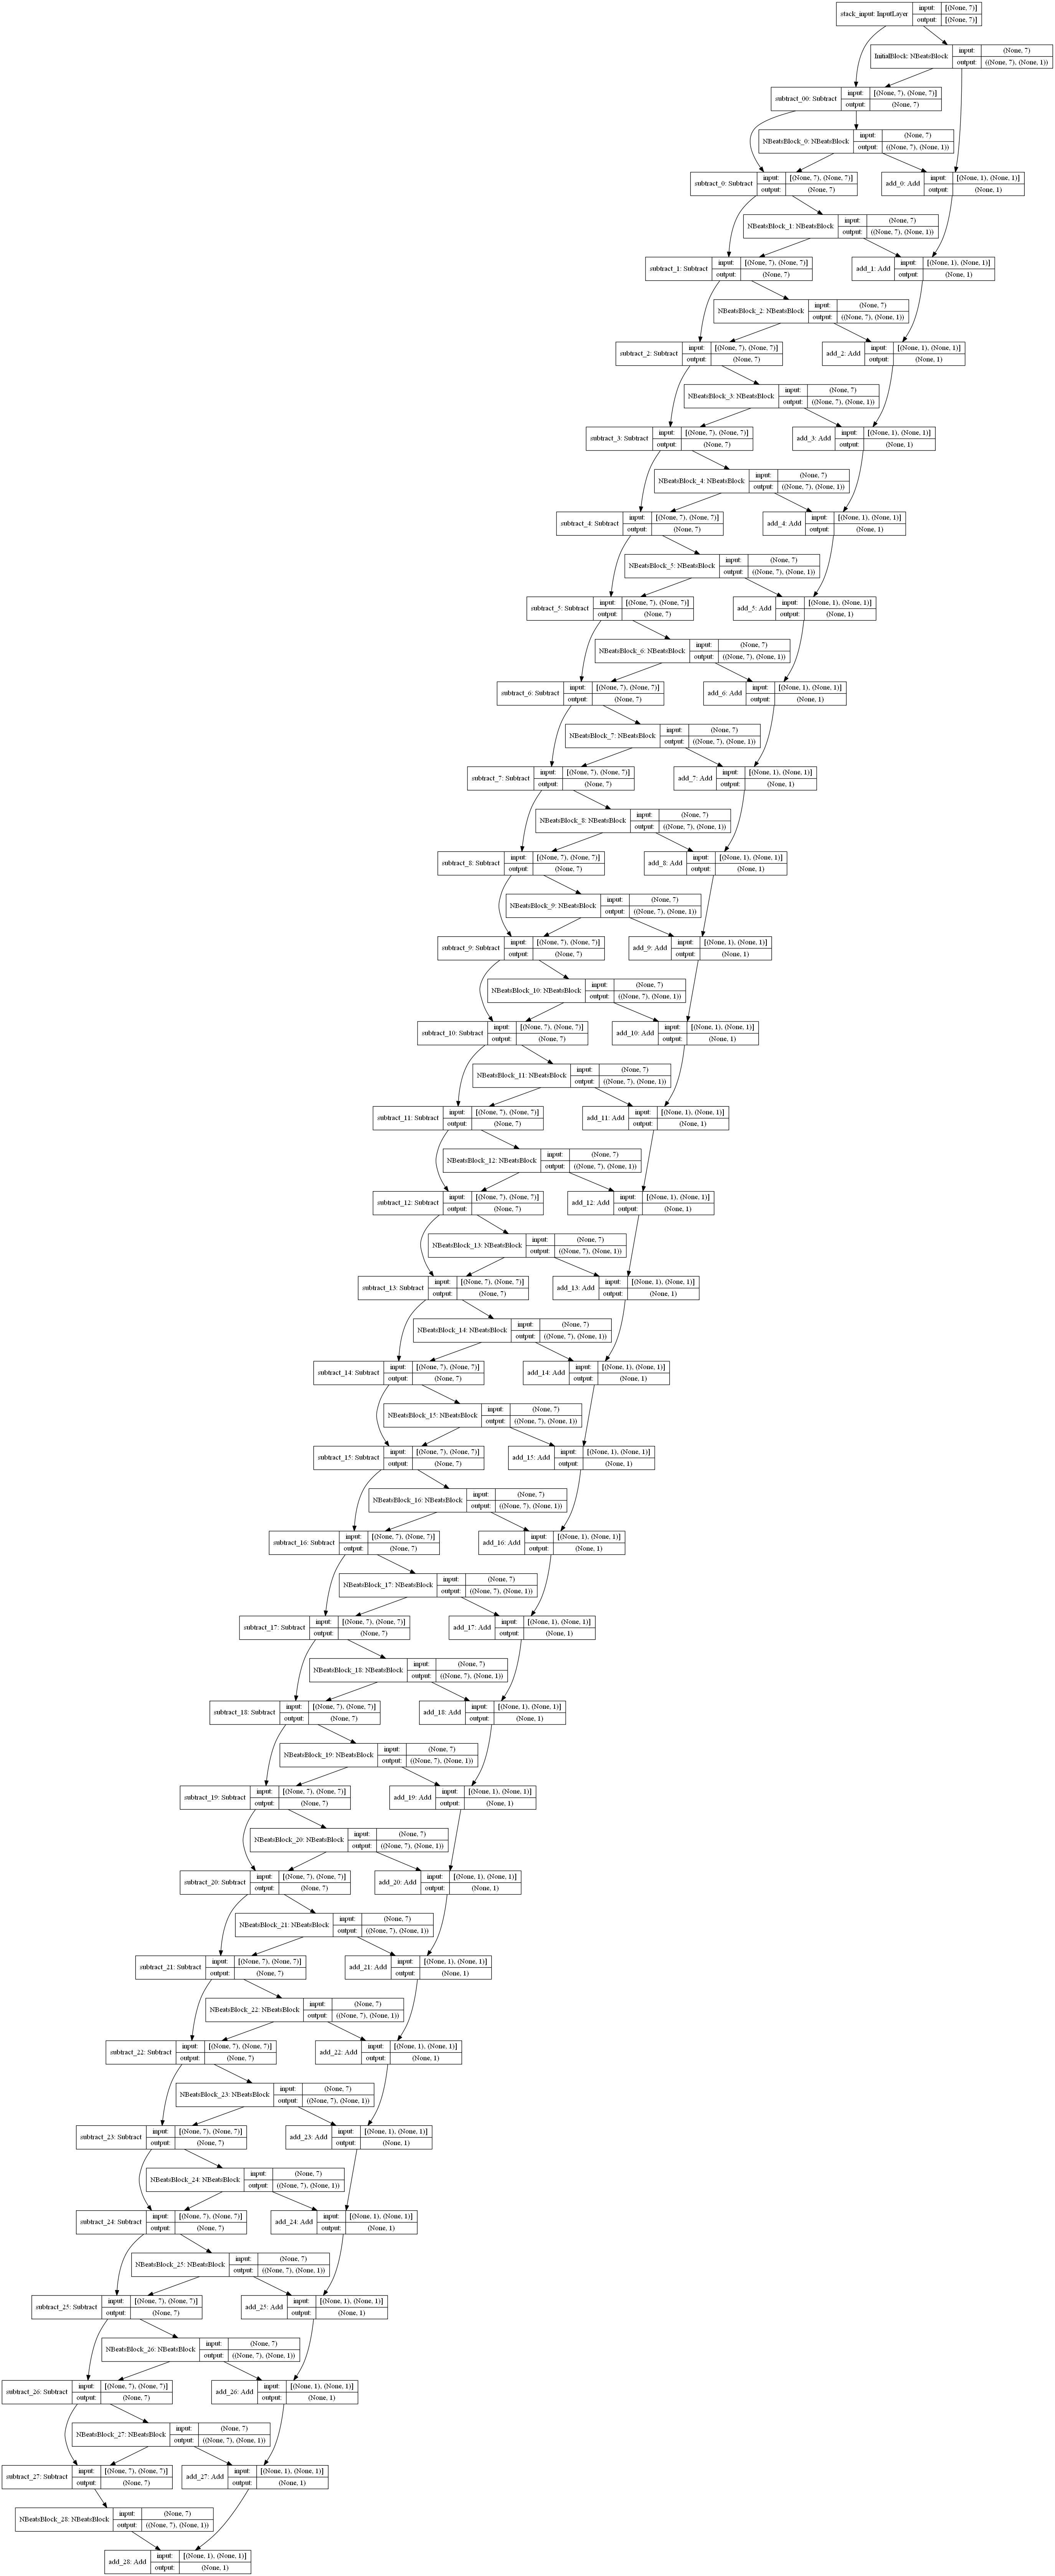

In [255]:
# Plot N-BEATS model and inspect the architecture
from tensorflow.keras.utils import plot_model
plot_model(model_6, show_shapes=True)

### Constructing and fitting an ensemble of models (using different loss functions)

In [256]:
# This will error out unless a "get_config()" method is implemented - this could be extra curriculum
model_6.save(model_6.name)

INFO:tensorflow:Assets written to: model_7_N-BEATS\assets


INFO:tensorflow:Assets written to: model_7_N-BEATS\assets
c:\Users\ksnis\miniconda3\envs\tf\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


We'll notice a warning appears telling us to fully save our model correctly we need to implement a [`get_config()`](https://www.tensorflow.org/guide/keras/save_and_serialize#how_savedmodel_handles_custom_objects) method in our custom layer class.

> **Resource:** If we would like to save and load the N-BEATS model or any other custom or subclassed layer/model configuration, you should overwrite the `get_config()` and optionally `from_config()` methods. See the [TensorFlow Custom Objects documentation](https://www.tensorflow.org/guide/keras/save_and_serialize#custom_objects) for more.

In [257]:
def get_ensemble_models(horizon = HORIZON,
                        train_data = train_dataset,
                        test_data = test_dataset,
                        num_iter = 10,
                        num_epochs = 100,
                        loss_fns = ["mae", "mse", "mape"]):
    """
    Returns a list of num_iter models each trained on MAE, MSE and MAPE loss.

    For example, if num_iter=10, a list of 30 trained models will be returned:
    10 * len(["mae", "mse", "mape"]).
    """
    
    # Make empty list for trained ensemble models
    ensemble_models = []
    
    # Create num_iter models per loss function
    for i in range(num_iter):
        # Build and fit a new model with a different loss function
        for loss_function in loss_fns:
            print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number : {i}")
            
            #construct a simple model (similar to model_1)
            model = tf.keras.Sequential([
                # Initialize layers with normal (Gaussian) distribution so we can use the models for prediction
                # interval estimation later: https://www.tensorflow.org/api_docs/python/tf/keras/initializers/HeNormal
                layers.Dense(128, activation="relu", kernel_initializer="he_normal"),
                layers.Dense(128, activation="relu", kernel_initializer="he_normal"),
                layers.Dense(HORIZON)
            ])
            
            # Compile the simple model with current loss function
            model.compile(loss=loss_function,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae", "mse"])
            
            # Fit the simple model
            model.fit(train_data,
                        epochs=num_epochs,
                        verbose=0,
                        validation_data=test_data,
                        callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=200, restore_best_weights=True),
                                   tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=100, verbose=1)])
            
            # Append the model to the ensemble models list
            ensemble_models.append(model)
    
    return ensemble_models # return the list of trained models
            

In [258]:
%%time
# Get a list of trained ensemble models
ensemble_models = get_ensemble_models(num_iter=5,num_epochs=1000)

Optimizing model by reducing: mae for 1000 epochs, model number : 0

Epoch 00105: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing: mse for 1000 epochs, model number : 0
Optimizing model by reducing: mape for 1000 epochs, model number : 0

Epoch 00135: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing: mae for 1000 epochs, model number : 1

Epoch 00713: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing: mse for 1000 epochs, model number : 1

Epoch 00712: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00812: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mape for 1000 epochs, model number : 1

Epoch 00234: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing: mae for 1000 epochs, model number : 2

Epoch 00105: ReduceLROnPlatea

In [259]:
# Create a function which uses a list of trained models to make and return a list of predictions
def make_ensemble_preds(ensemble_models, data):
    """
    Returns a list of predictions from a list of trained models.
    """
    # Make predictions with each model and append to preds list
    ensemble_preds = []
    for model in ensemble_models:
        preds = model.predict(data) # make predictions with current ensemble model
        ensemble_preds.append(preds)
    return tf.constant(tf.squeeze(ensemble_preds))

In [260]:
# Create a list of predictions from the ensemble models
ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models, data=test_dataset)
ensemble_preds

<tf.Tensor: shape=(15, 502), dtype=float32, numpy=
array([[120.96878 , 118.52982 , 119.59236 , ..., 155.78358 , 155.65036 ,
        157.5305  ],
       [121.11433 , 119.01913 , 120.18093 , ..., 155.30751 , 156.65248 ,
        156.73915 ],
       [121.82543 , 120.146996, 118.77479 , ..., 155.22263 , 155.81511 ,
        157.1898  ],
       ...,
       [121.38153 , 119.50231 , 118.60945 , ..., 155.6803  , 155.8043  ,
        157.1568  ],
       [122.40164 , 121.60486 , 116.68589 , ..., 154.59567 , 153.95824 ,
        158.66016 ],
       [121.28187 , 119.21919 , 118.56934 , ..., 155.53096 , 155.17873 ,
        157.1523  ]], dtype=float32)>

In [261]:
# Evaluate ensemble model(s) predictions
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=np.median(ensemble_preds, axis=0)) # take the median across all ensemble predictions
ensemble_results

{'mae': 16.235418,
 'mse': 407.38696,
 'rmse': 11.0108185,
 'mape': 11.0108185,
 'mase': 7.579078}

Looks like the ensemble model is the best performing model on the MAE metric so far.

### Plotting the prediction intervals (uncertainty estimates) of our ensemble

One way of getting the 95% condfidnece prediction intervals for a deep learning model is the bootstrap method:

* Take the predictions from a number of randomly initialized models (we've got this thanks to our ensemble model)
* Measure the standard deviation of the predictions
* Multiply standard deviation by 1.96 (assuming the distribution is Gaussian, 95% of observations fall within 1.96 standard deviations of the mean, this is why we initialized our neural networks with a normal distribution)
To get the prediction interval upper and lower bounds, add and subtract the value obtained in (3) to the mean/median of the predictions made in (1)

In [262]:
# Find upper and lower bounds of ensemble predictions
def get_upper_lower(preds): # 1. Take the predictions of multiple randomly initialized deep learning neural networks
  
  # 2. Measure the standard deviation of the predictions
  std = tf.math.reduce_std(preds, axis=0)
  
  # 3. Multiply the standard deviation by 1.96
  interval = 1.96 * std  

  # 4. Get the prediction interval upper and lower bounds
  preds_mean = tf.reduce_mean(preds, axis=0)
  lower, upper = preds_mean - interval, preds_mean + interval
  return lower, upper



In [263]:
# Get the upper and lower bounds of the 95% 
lower, upper = get_upper_lower(preds=ensemble_preds)

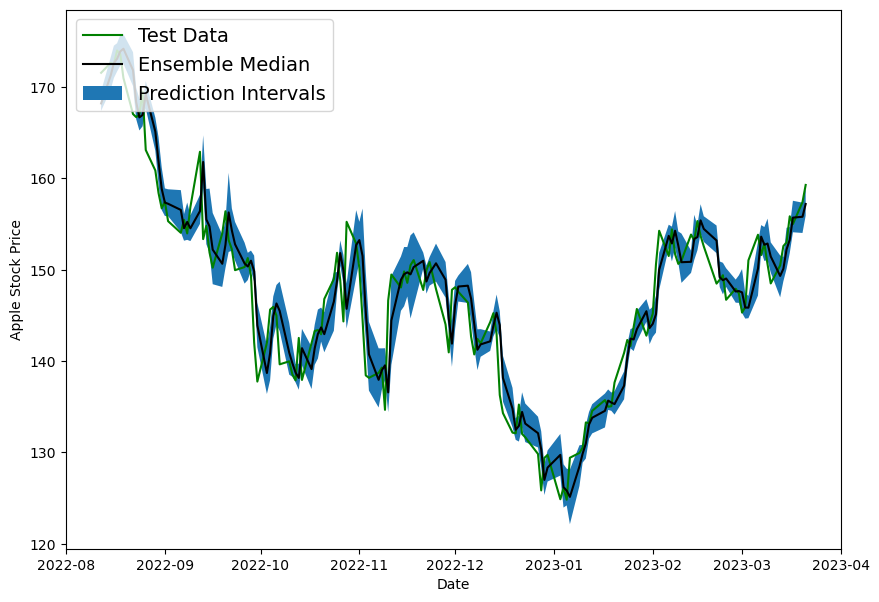

In [264]:
# Get the median values of our ensemble preds
ensemble_median = np.median(ensemble_preds, axis=0)

# Plot the median of our ensemble preds along with the prediction intervals (where the predictions fall between)
offset=350
plt.figure(figsize=(10, 7))
plt.plot(X_test.index[offset:], y_test[offset:], "g", label="Test Data")
plt.plot(X_test.index[offset:], ensemble_median[offset:], "k-", label="Ensemble Median")
plt.xlabel("Date")
plt.ylabel("Apple Stock Price")
plt.fill_between(X_test.index[offset:], 
                 (lower)[offset:], 
                 (upper)[offset:], label="Prediction Intervals")
plt.legend(loc="upper left", fontsize=14);

We've just plotted:

* The test data (the ground truth Apple Stock prices)
* The median of the ensemble predictions
* The 95% prediction intervals (assuming the data is Gaussian/normal, the model is saying that 95% of the time, predicted value should fall between this range)
What can we tell about the ensemble model from the plot above?

It looks like the ensemble predictions are lagging slightly behind the actual data.

And the prediction intervals are fairly low throughout.

The combination of lagging predictions as well as low prediction intervals indicates that our ensemble model may be overfitting the data, meaning it's basically replicating what a naïve model would do and just predicting the previous timestep value for the next value.

This would explain why previous attempts to beat the naïve forecast have been futile.

We can test this hypothesis of overfitting by creating a model to make predictions into the future and seeing what they look like.

### Two types of uncertainty (coconut and subway)

Inheritly, we know you cannot predict the future.

That doesn't mean trying to isn't valuable.

However, as we've discussed knowing a **prediction interval** or **uncertainty estimate** can be as helpful or even more helpful than a point prediction itself.

Uncertainty estimates seek out to qualitatively and quantitatively answer the questions:
* What can my model know? (with perfect data, what's possible to learn?)
* What doesn't my model know? (what can a model never predict?)

There are two types of uncertainty in machine learning you should be aware of:

* **Aleatoric uncertainty** - this type of uncertainty cannot be reduced, it is also referred to as "data" or "subway" uncertainty.
  * Let's say our train is scheduled to arrive at 10:08am but very rarely does it arrive at *exactly* 10:08am. We know it's usually a minute or two either side and perhaps up to 10-minutes late if traffic is bad. Even with all the data we could imagine, this level of uncertainty is still going to be present (much of it being noise).
  * When we measured prediction intervals, we were measuring a form of subway uncertainty for Apple stock price predictions (a little either side of the point prediction).

* **Epistemic uncertainty** - this type of uncertainty can be reduced, it is also referred to as "model" or "coconut" uncertainty, it is very hard to calculate.
  * The analogy for coconut uncertainty involves whether or not we'd get hit on the head by a coconut when going to a beach. 
    * If we were at a beach with coconuts trees, as you could imagine, this would be very hard to calculate. How often does a coconut fall of a tree? Where are you standing? 
    * But we could reduce this uncertainty to zero by going to a beach without coconuts (collect more data about your situation).
  * Model uncertainty can be reduced by collecting more data samples/building a model to capture different parameters about the data we're modelling.

The lines between these are blurred (one type of uncertainty can change forms into the other) and they can be confusing at first but are important to keep in mind for any kind of time series prediction.

If we ignore the uncertanties, are you really going to get a reliable prediction?

### Learning more on uncertainty

The field of quantifying uncertainty estimation in machine learning is a growing area of research.

If you'd like to learn more I'd recommend the following.

> **Resources:** Places to learn more about uncertainty in machine learning/forecasting:
* [MIT 6.S191: Evidential Deep Learning and Uncertainty](https://youtu.be/toTcf7tZK8c) 
* [Uncertainty quantification on Wikipedia](https://en.wikipedia.org/wiki/Uncertainty_quantification#Aleatoric_and_epistemic_uncertainty)
* [*Why you should care about the Nate Silver vs. Nassim Taleb Twitter war*](https://towardsdatascience.com/why-you-should-care-about-the-nate-silver-vs-nassim-taleb-twitter-war-a581dce1f5fc) by Isaac Faber - a great insight into the role of uncertainty in the example of election prediction. 
* [*3 facts about time series forecasting that surprise experienced machine learning practitioners*](https://towardsdatascience.com/3-facts-about-time-series-forecasting-that-surprise-experienced-machine-learning-practitioners-69c18ee89387) by Skander Hannachi - fantastic outline of some of the main mistakes people make when building forecasting models, especially forgetting about uncertainty estimates.
* [*Engineering Uncertainty Estimation in Neural Networks for Time Series Prediction at Uber*](https://eng.uber.com/neural-networks-uncertainty-estimation/) - a discussion on techniques Uber used to engineer uncertainty estimates into their time sereis neural networks.


### Model 9: Train a model on the full historical data to make predictions into future

> **Note:** Forecasting models need to be retrained every time a forecast is made. Because if Apple stock prices are updated daily and we predict the price for tomorrow. Our model is only really valid for one day. When a new price comes out (e.g. the next day), we'll have to retrain our model to incorporate that new price to predict the next forecast.

In [265]:
apple_stock_prices_nbeats.head(10)

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-03-22 00:00:00-04:00,14.247962,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-03-25 00:00:00-04:00,14.299477,14.247962,NaN,NaN,NaN,NaN,NaN,NaN
2013-03-26 00:00:00-04:00,14.224209,14.299477,14.247962,NaN,NaN,NaN,NaN,NaN
2013-03-27 00:00:00-04:00,13.944746,14.224209,14.299477,14.247962,NaN,NaN,NaN,NaN
2013-03-28 00:00:00-04:00,13.654182,13.944746,14.224209,14.299477,14.247962,NaN,NaN,NaN
2013-04-01 00:00:00-04:00,13.230054,13.654182,13.944746,14.224209,14.299477,14.247962,NaN,NaN
2013-04-02 00:00:00-04:00,13.257195,13.230054,13.654182,13.944746,14.224209,14.299477,14.247962,NaN
2013-04-03 00:00:00-04:00,13.325057,13.257195,13.230054,13.654182,13.944746,14.224209,14.299477,14.247962
2013-04-04 00:00:00-04:00,13.193347,13.325057,13.257195,13.230054,13.654182,13.944746,14.224209,14.299477


In [266]:
# Train model on entire data to make prediction for the next day 
X_all = apple_stock_prices_nbeats.drop(["Price"], axis=1).dropna().to_numpy() # only want prices, our future model can be a univariate model
y_all = apple_stock_prices_nbeats.dropna()["Price"].to_numpy()

X_all.shape, y_all.shape

((2510, 7), (2510,))

In [267]:
X_all

array([[ 13.25719547,  13.2300539 ,  13.65418243, ...,  14.22420883,
         14.29947662,  14.247962  ],
       [ 13.32505703,  13.25719547,  13.2300539 , ...,  13.94474602,
         14.22420883,  14.29947662],
       [ 13.19334698,  13.32505703,  13.25719547, ...,  13.65418243,
         13.94474602,  14.22420883],
       ...,
       [155.8500061 , 152.99000549, 152.58999634, ..., 148.5       ,
        150.58999634, 152.86999512],
       [155.        , 155.8500061 , 152.99000549, ..., 150.47000122,
        148.5       , 150.58999634],
       [157.3999939 , 155.        , 155.8500061 , ..., 152.58999634,
        150.47000122, 148.5       ]])

In [268]:
# 1. Turn X and y into tensor Datasets
features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

# 2. Combine features & labels
dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

# 3. Batch and prefetch for optimal performance
BATCH_SIZE = 1024 # taken from Appendix D in N-BEATS paper
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all

<PrefetchDataset shapes: ((None, 7), (None,)), types: (tf.float64, tf.float64)>

In [269]:
tf.random.set_seed(42)

# Create model (nice and simple, just to test)
model_8 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
])

# Compile
model_8.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam())

# Fit model on all of the data to make future forecasts
model_8.fit(dataset_all,
            epochs=100,
            verbose=0) # don't print out anything, we've seen this all before

In [270]:
# How many timesteps to predict into the future?
INTO_FUTURE = 14 # since our Apple stock data is daily, this is for 14 days

In [271]:
# 1. Create function to make predictions into the future
def make_future_forecast(values, model, into_future, window_size=WINDOW_SIZE) -> list:
  """
  Makes future forecasts into_future steps after values ends.

  Returns future forecasts as list of floats.
  """
  # 2. Make an empty list for future forecasts/prepare data to forecast on
  future_forecast = []
  last_window = values[-WINDOW_SIZE:] # only want preds from the last window (this will get updated)

  # 3. Make INTO_FUTURE number of predictions, altering the data which gets predicted on each time 
  for _ in range(into_future):
    
    # Predict on last window then append it again, again, again (model starts to make forecasts on its own forecasts)
    future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    print(f"Predicting on: \n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")
    
    # Append predictions to future_forecast
    future_forecast.append(tf.squeeze(future_pred).numpy())
    # print(future_forecast)

    # Update last window with new pred and get WINDOW_SIZE most recent preds (model was trained on WINDOW_SIZE windows)
    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]
  
  return future_forecast

In [272]:
# Make forecasts into future of the price of Bitcoin
# Note: if you're reading this at a later date, you may already be in the future, so the forecasts 
# we're making may not actually be forecasts, if that's the case, readjust the training data.
future_forecast = make_future_forecast(values=y_all,
                                       model=model_8,
                                       into_future=INTO_FUTURE,
                                       window_size=WINDOW_SIZE)

Predicting on: 
 [150.47000122 152.58999634 152.99000549 155.8500061  155.
 157.3999939  159.27999878] -> Prediction: 152.4786834716797

Predicting on: 
 [152.58999634 152.99000549 155.8500061  155.         157.3999939
 159.27999878 152.47868347] -> Prediction: 154.3686065673828

Predicting on: 
 [152.99000549 155.8500061  155.         157.3999939  159.27999878
 152.47868347 154.36860657] -> Prediction: 155.37059020996094

Predicting on: 
 [155.8500061  155.         157.3999939  159.27999878 152.47868347
 154.36860657 155.37059021] -> Prediction: 155.45382690429688

Predicting on: 
 [155.         157.3999939  159.27999878 152.47868347 154.36860657
 155.37059021 155.4538269 ] -> Prediction: 155.52430725097656

Predicting on: 
 [157.3999939  159.27999878 152.47868347 154.36860657 155.37059021
 155.4538269  155.52430725] -> Prediction: 156.28599548339844

Predicting on: 
 [159.27999878 152.47868347 154.36860657 155.37059021 155.4538269
 155.52430725 156.28599548] -> Prediction: 154.857940

In [273]:
future_forecast[:10]

[152.47868,
 154.3686,
 155.37059,
 155.45383,
 155.5243,
 156.286,
 154.85794,
 154.15337,
 155.05193,
 155.1292]

In [274]:
def get_future_dates(start_date, into_future, offset=1):
  """
  Returns array of datetime values from ranging from start_date to start_date+horizon.

  start_date: date to start range (np.datetime64)
  into_future: number of days to add onto start date for range (int)
  offset: number of days to offset start_date by (default 1)
  """
  start_date = start_date + np.timedelta64(offset, "D") # specify start date, "D" stands for day
  end_date = start_date + np.timedelta64(into_future, "D") # specify end date
  return np.arange(start_date, end_date, dtype="datetime64[D]") # return a date range between start date and end date

In [278]:
print(type(last_timestep))
print(last_timestep)

<class 'datetime.datetime'>
2023-03-20 00:00:00-04:00


In [279]:
from datetime import datetime

last_timestep = datetime.strptime(last_timestep, '%Y-%m-%d %H:%M:%S')

TypeError: strptime() argument 1 must be str, not datetime.datetime

In [ ]:
# Get next two weeks of timesteps
next_time_steps = get_future_dates(start_date=last_timestep, 
                                   into_future=INTO_FUTURE)
next_time_steps

UFuncTypeError: ufunc 'add' cannot use operands with types dtype('O') and dtype('<m8[D]')